In [48]:
# Import libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [49]:
# Upload api keys and tokens
api_key = 'XXXXXXXXXXXXXXX'
api_secret = 'XXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXX'

In [50]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(api_key, api_secret)

# Set the access token and access token secret
authenticate.set_access_token(access_token, access_secret) 

# Create the API object
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [51]:
# Extract 100 tweets from the twitter handle
posts = api.user_timeline(screen_name="Oprah", count = 100, lang ="en", tweet_mode="extended")

In [52]:
#  The last 5 tweets
print("Recent 5 tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +'. '+ tweet.full_text + '\n')
    i= i+1

Recent 5 tweets:

1. RT @DrewBarrymoreTV: Today's show was one for the books! 🎉 Watch the full episode with @Oprah, Dr. Bruce Perry, @dionnewarwick &amp; @ChefRoyCh…

2. RT @DrewBarrymoreTV: .@Oprah Winfrey gets emotional talking about the importance of @GayleKing in her life 💛

Watch: https://t.co/za1qtZLOs…

3. RT @DrewBarrymoreTV: .@Oprah Winfrey reveals how Drew changed her life with the show’s use of green-screen technology.

Watch: https://t.co…

4. To prepare for my interview with @TheElliotPage, I watched @disclosure_doc, a documentary on the history of trans images in film &amp; TV. Such an important film. I found it so enlightening. Things I thought I knew, I didn’t. Bravo @SamFederFilm, @amyscholder, &amp; @LaverneCox!

5. Stream our conversation now on @AppleTV+:
https://t.co/JmNwHv6cgK



In [53]:
# Create a dataframe with a column 'Tweets'
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

# First 5 rows of data
df.head()

,Tweets
0,RT @DrewBarrymoreTV: Today's show was one for ...
1,RT @DrewBarrymoreTV: .@Oprah Winfrey gets emot...
2,RT @DrewBarrymoreTV: .@Oprah Winfrey reveals h...
3,To prepare for my interview with @TheElliotPag...
4,Stream our conversation now on @AppleTV+:\nhtt...


In [54]:
# Function to clean the tweets
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
    return text

# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Cleaned tweets
df

,Tweets
0,: Today's show was one for the books! 🎉 Watch ...
1,: . Winfrey gets emotional talking about the i...
2,: . Winfrey reveals how Drew changed her life ...
3,"To prepare for my interview with , I watched _..."
4,Stream our conversation now on +:\n
...,...
95,. nominated as a Performer of the Year. They ...
96,Hey Frank Marshall Just finished watching you...
97,I’m relaunching ’s website in 2021. How about ...
98,Not only 1 but THe most played song in the w...


In [55]:
# Function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Function to get the polarity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

# Create two new columns 'Subjectivity' and 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# The updated dataframe
df

,Tweets,Subjectivity,Polarity
0,: Today's show was one for the books! 🎉 Watch ...,0.550000,0.350000
1,: . Winfrey gets emotional talking about the i...,0.650000,0.000000
2,: . Winfrey reveals how Drew changed her life ...,0.000000,0.000000
3,"To prepare for my interview with , I watched _...",0.475000,0.193750
4,Stream our conversation now on +:\n,0.000000,0.000000
...,...,...,...
95,. nominated as a Performer of the Year. They ...,0.575000,-0.200781
96,Hey Frank Marshall Just finished watching you...,0.400000,0.350000
97,I’m relaunching ’s website in 2021. How about ...,0.000000,0.000000
98,Not only 1 but THe most played song in the w...,0.758929,0.396429


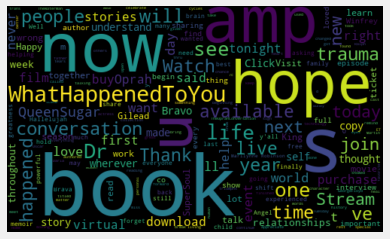

In [56]:
# Wordcloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [57]:
# Function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Updated dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,: Today's show was one for the books! 🎉 Watch ...,0.550000,0.350000,Positive
1,: . Winfrey gets emotional talking about the i...,0.650000,0.000000,Neutral
2,: . Winfrey reveals how Drew changed her life ...,0.000000,0.000000,Neutral
3,"To prepare for my interview with , I watched _...",0.475000,0.193750,Positive
4,Stream our conversation now on +:\n,0.000000,0.000000,Neutral
...,...,...,...,...
95,. nominated as a Performer of the Year. They ...,0.575000,-0.200781,Negative
96,Hey Frank Marshall Just finished watching you...,0.400000,0.350000,Positive
97,I’m relaunching ’s website in 2021. How about ...,0.000000,0.000000,Neutral
98,Not only 1 but THe most played song in the w...,0.758929,0.396429,Positive


In [58]:
# Printing only the positive tweets 
print('Positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + '. '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Positive tweets:

1. : Today's show was one for the books! 🎉 Watch the full episode with , Dr. Bruce Perry,  &amp; …

2. To prepare for my interview with , I watched _doc, a documentary on the history of trans images in film &amp; TV. Such an important film. I found it so enlightening. Things I thought I knew, I didn’t. Bravo , , &amp; !

3. My next guest on TheOprahConversation is . I hope this serves as an invitation for people to understand, appreciate, &amp; know that every human born on this planet wants the same thing. We want to be accepted, loved, &amp; live in health &amp; safety as our authentic self. 

4. Click here to purchase yourself a copy, available now wherever you buy or download your books from. All of my proceeds made from this book will go right to the Boys &amp; Girls Club in Mississippi. 

5. Through conversations with my co-author Dr. , my eyes have been opened to the fact that although I experienced abuse and trauma as a child, my brain found ways to adapt. Thi

In [59]:
# Printing only the negative tweets  
print('Negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + '. '+sortedDF['Tweets'][i])
    print()
    j=j+1

Negative tweets:

1. It took decades of work, conversations, and healing to break those cycles and make peace with my past. That’s why I co-authored a book titled WhatHappenedToYou with Dr. , to help us heal and shift from asking “What’s wrong with you?” to “What happened to you?” 

2. : Following a guilty verdict for Derek Chauvin for the murder of GeorgeFloyd, Oprah talked with activist —the civil r…

3.  You’re late to the CROWN party. Where u been?

4. . nominated  as a Performer of the Year. They said they’d give her ALL the amens for this passionate sermon in Greenleaf's finale. Well I’ll add some hallelujahs, pass the collection plate around, &amp; give her a standing O! Bravo, bravo Lynn! Take your BOW🙏🏽 



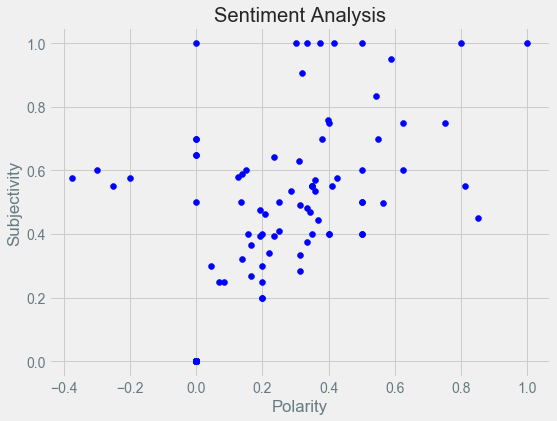

In [60]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 

plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [61]:
# Percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

68.0

In [62]:
# Percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

4.0

In [63]:
# Value counts
df['Analysis'].value_counts()

Positive    68
Neutral     28
Negative     4
Name: Analysis, dtype: int64

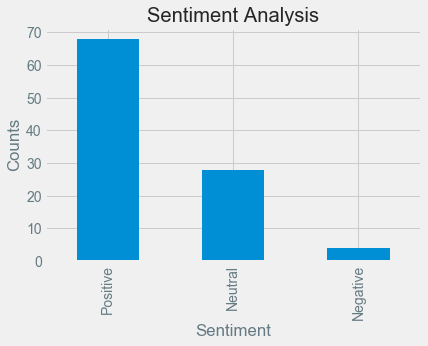

In [64]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()